<a href="https://colab.research.google.com/github/DancinFlowrBear/01-CV-LAB-BC75-2501982033-Sahrian/blob/main/02_CV_LAB_BC75_2501982033_Sahrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pylab as pylab

In [2]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import seaborn as sns

In [3]:
def plot_image(image, title = ''):
  pylab.title(title, size = 20), pylab.imshow(image)
  pylab.axis('off')

def plot_hist(r, g, b, title = ''):
  r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
  pylab.hist(np.array(r).ravel(), bins = 256, range = (0, 256), color = 'r', alpha = 0.5)
  pylab.hist(np.array(g).ravel(), bins = 256, range = (0, 256), color = 'g', alpha = 0.5)
  pylab.hist(np.array(b).ravel(), bins = 256, range = (0, 256), color = 'b', alpha = 0.5)
  pylab.xlabel('pixel value', size = 20), pylab.ylabel('frequency', size = 20)
  pylab.title(title, size = 20)

In [4]:
im = Image.open("/content/content.jpg")
print(im.mode)

RGB


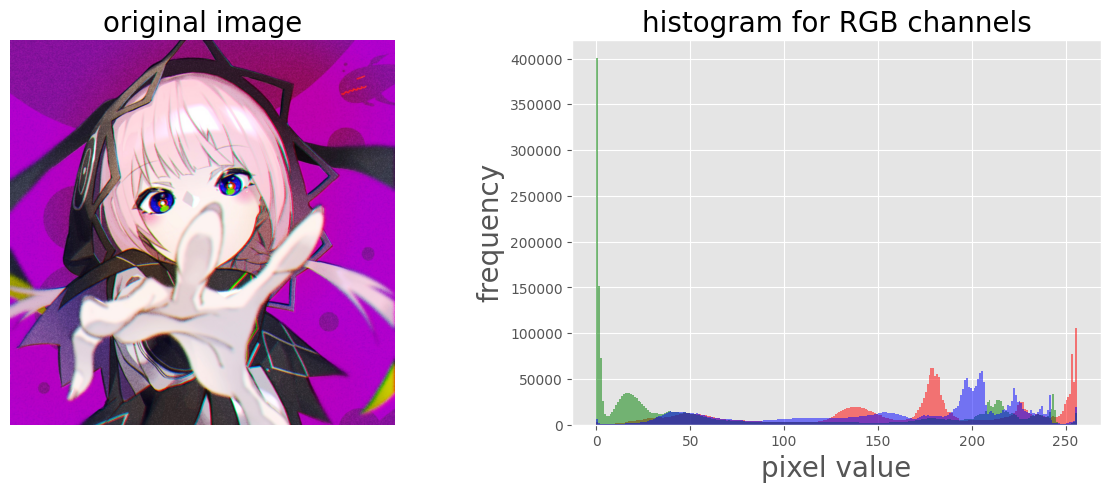

In [5]:
im = Image.open("/content/content.jpg")
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize = (15,5))
pylab.subplot(121), plot_image(im, 'original image')
pylab.subplot(122), plot_hist(im_r, im_g, im_b,'histogram for RGB channels')
pylab.show()

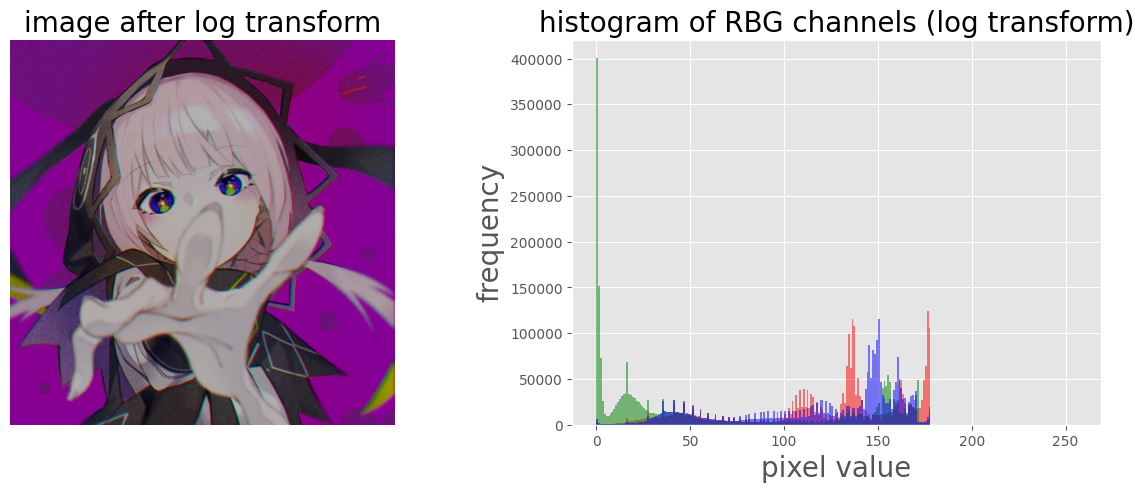

In [6]:
im = im.point(lambda i: 255*np.log(1+i/255))
im_r, im_g, im_b = im.split()
pylab.style.use('ggplot')
pylab.figure(figsize = (15,5))
pylab.subplot(121), plot_image(im, 'image after log transform')
pylab.subplot(122), plot_hist(im_r, im_g, im_b, 'histogram of RBG channels (log transform)')
pylab.show()

<function matplotlib.pyplot.show(close=None, block=None)>

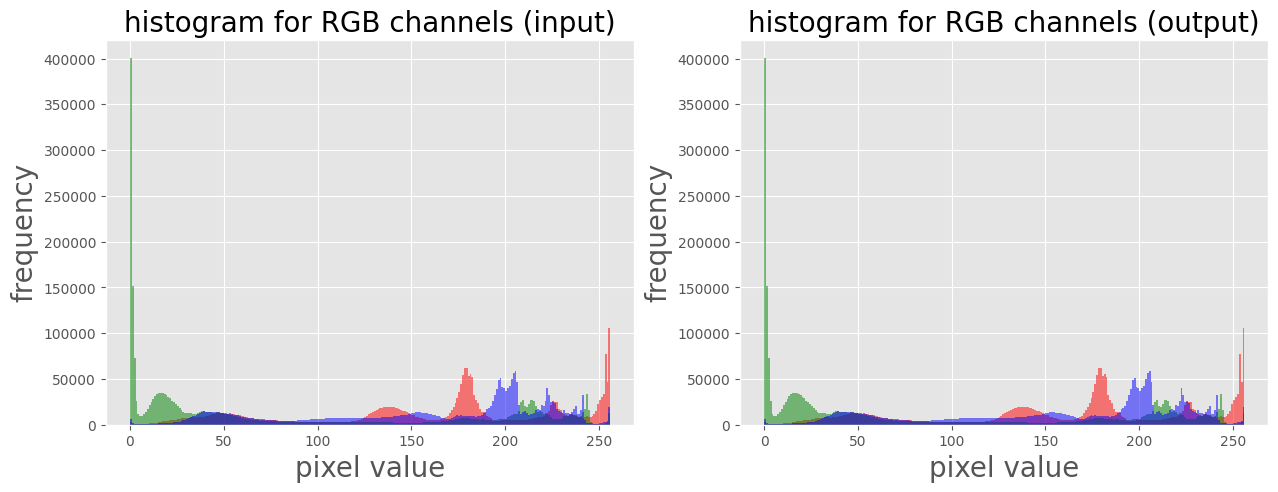

In [7]:
im = img_as_float(imread('/content/content.jpg'))
gamma = 0.2
im1 = im**gamma
pylab.style.use('ggplot')
pylab.figure(figsize = (15,5))
pylab.subplot(121), plot_hist(im[...,0], im[...,1], im[...,2], 'histogram for RGB channels (input)')
pylab.subplot(122), plot_hist(im[...,0], im[...,1], im[...,2], 'histogram for RGB channels (output)')
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

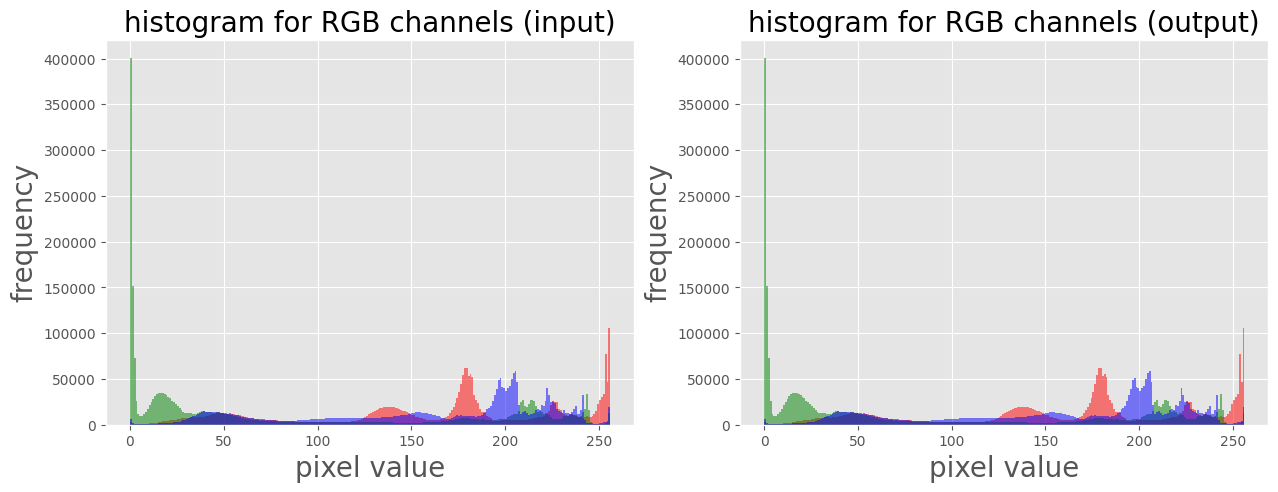

In [8]:
im = img_as_float(imread('/content/content.jpg'))
gamma = 1
im1 = im**gamma
pylab.style.use('ggplot')
pylab.figure(figsize = (15,5))
pylab.subplot(121), plot_hist(im[...,0], im[...,1], im[...,2], 'histogram for RGB channels (input)')
pylab.subplot(122), plot_hist(im[...,0], im[...,1], im[...,2], 'histogram for RGB channels (output)')
pylab.show

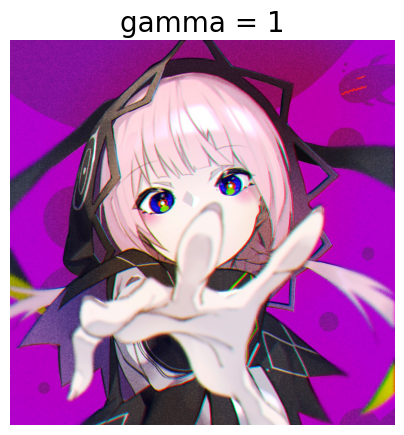

In [9]:
pylab.figure(figsize = (15,5))
pylab.subplot(121), plot_image(im1, 'gamma = 1')
pylab.show()

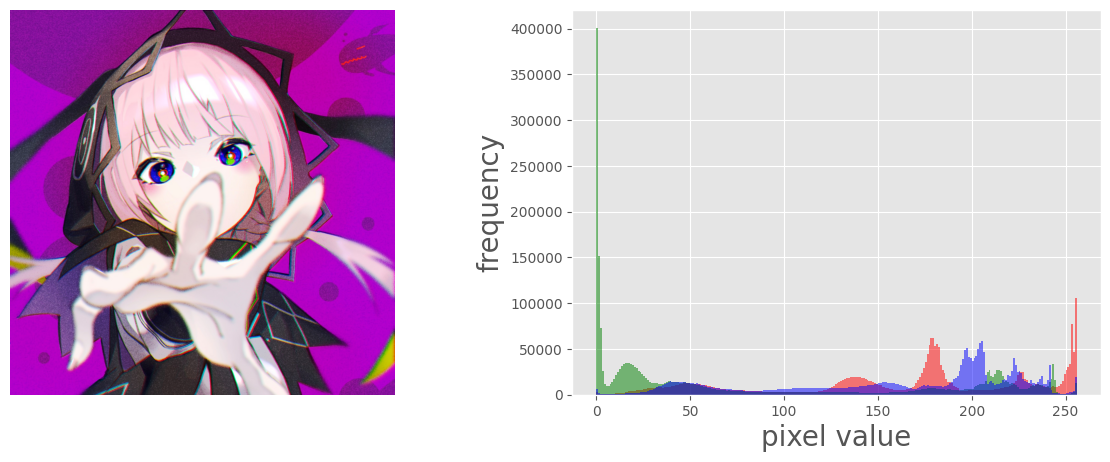

In [10]:
im = Image.open('/content/content.jpg')
im_r, im_g, im_b = im.split()

pylab.style.use('ggplot')
pylab.figure(figsize = (15,5))
pylab.subplot(121)
plot_image(im)
pylab.subplot(122)
plot_hist(im_r, im_g, im_b)
pylab.show()

In [11]:
def contrast(c):
  return 0 if c < 70 else (255 if c > 150 else (255*c - 22950) / 48)

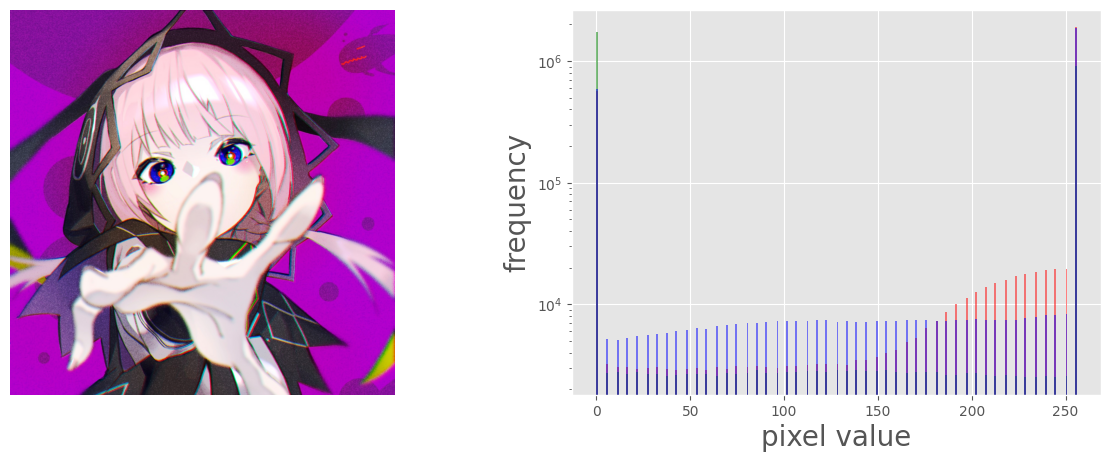

In [12]:
im1 = im.point(contrast)
im_r, im_g, im_b = im1.split()

pylab.style.use('ggplot')
pylab.figure(figsize = (15,5))
pylab.subplot(121)
plot_image(im)
pylab.subplot(122)
plot_hist(im_r, im_g, im_b)
pylab.yscale('log', base = 10)
pylab.show()

# Histogram Equalization

<Figure size 640x480 with 0 Axes>

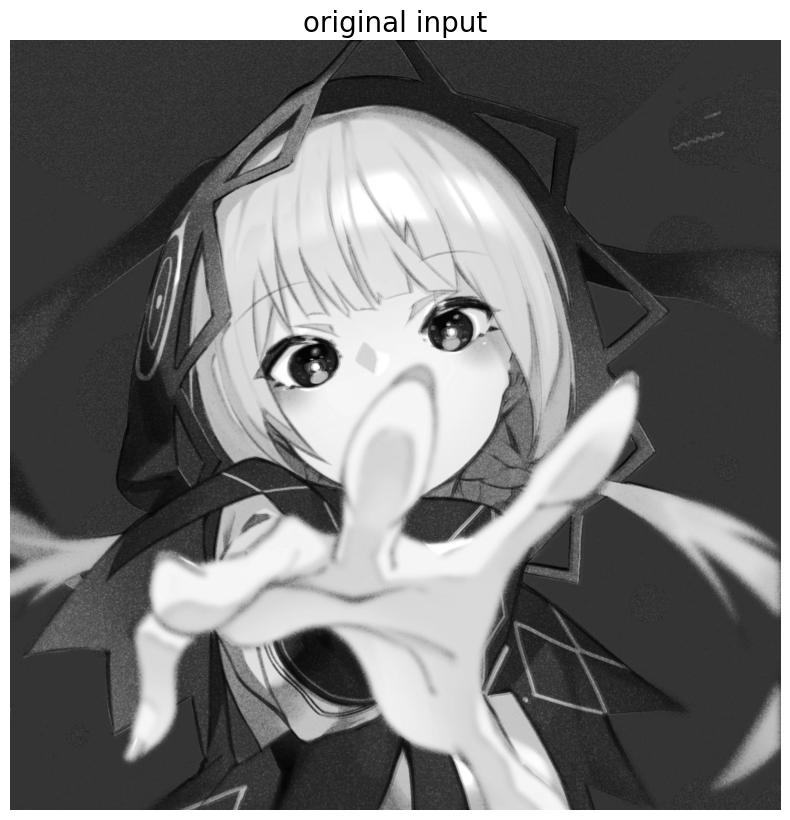

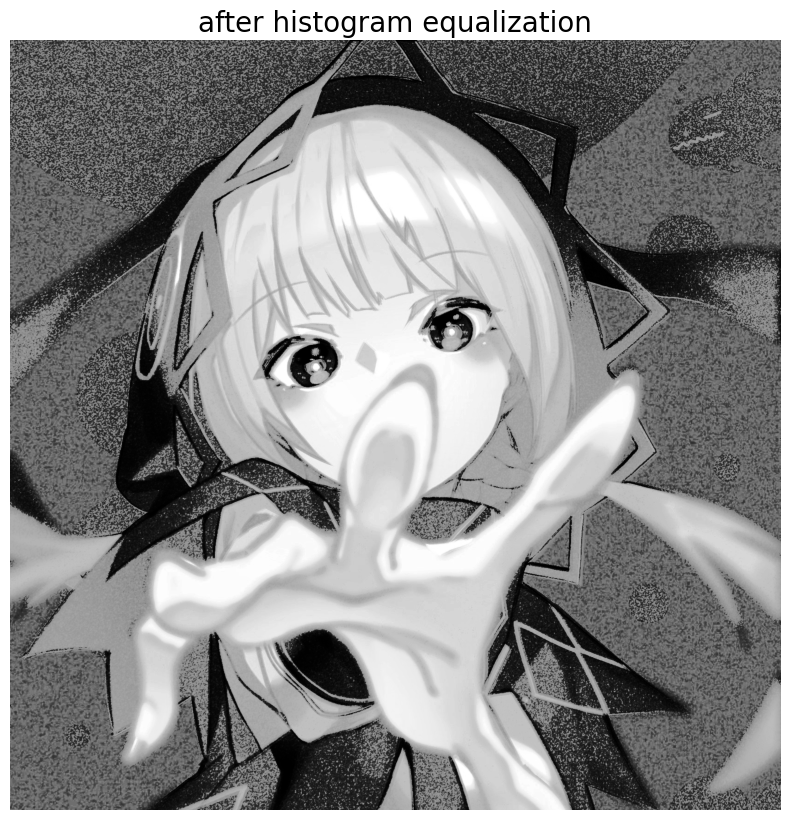

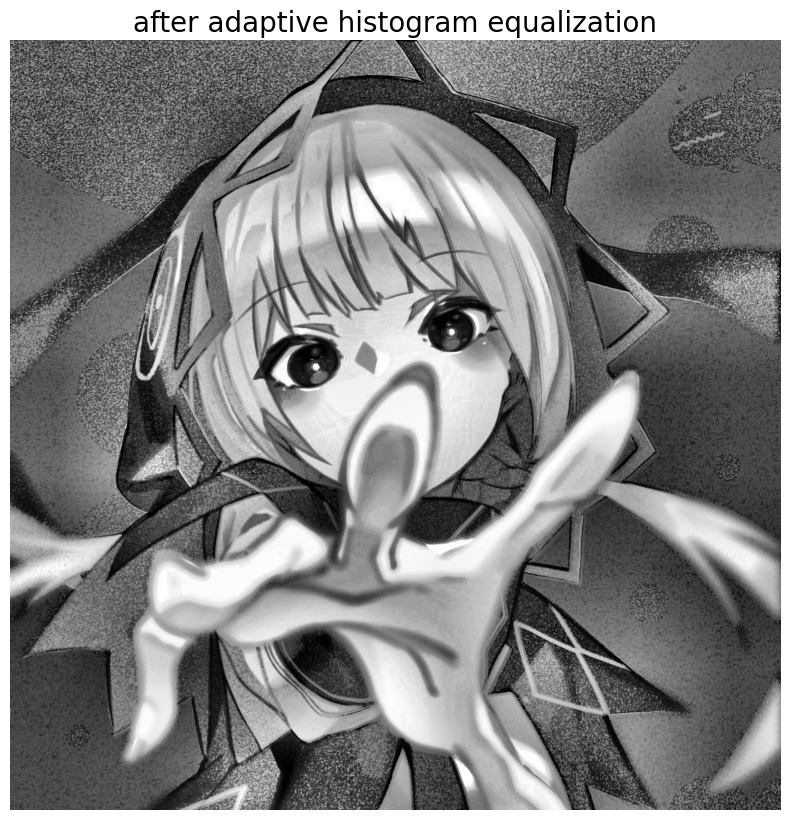

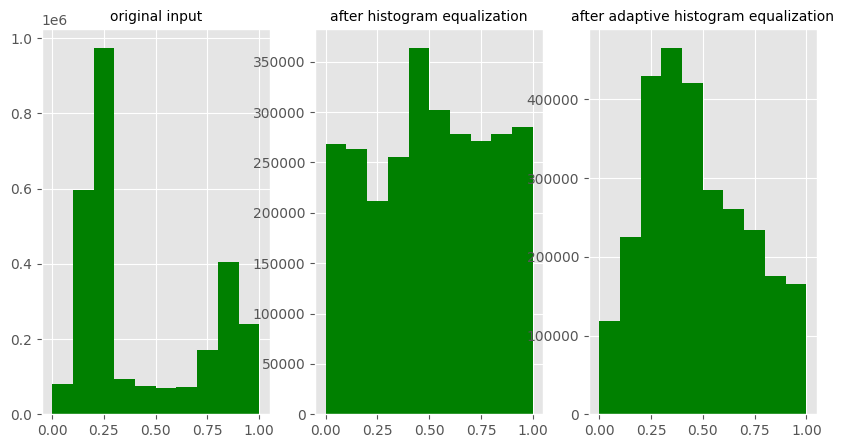

In [13]:
img = rgb2gray(imread('/content/content.jpg'))

img_eq = exposure.equalize_hist(img)

img_adapteq = exposure.equalize_adapthist(img, clip_limit = 0.03)
pylab.gray()
images = [img, img_eq, img_adapteq]
titles = ['original input', 'after histogram equalization', 'after adaptive histogram equalization']
for i in range(3):
  pylab.figure(figsize = (20,10)), plot_image(images[i], titles[i])

pylab.figure(figsize = (10,5))
for i in range(3):
  pylab.subplot(1,3,i+1), pylab.hist(images[i].ravel(), color = 'g'), pylab.title(titles[i], size = 10)

pylab.show()

In [14]:
import matplotlib
matplotlib.rcParams['font.size'] = 8
def plot_image_and_hist(image, axes, bins = 256):
  image = img_as_float(image)
  axes_image, axes_hist = axes
  axes_cdf = axes_hist.twinx()
  axes_image.imshow(image, cmap = pylab.cm.gray)
  axes_image.set_axis_off()
  axes_hist.hist(image.ravel(), bins = bins, histtype = 'step', color = 'black')
  axes_hist.set_xlim(0,1)
  axes_hist.set_xlabel('Pixel Intensity', size = 15)
  axes_hist.ticklabel_format(axis = 'y', style = 'scientific', scilimits = (0,0))
  axes_hist.set_yticks([])
  image_cdf, bins = exposure.cumulative_distribution(image, bins)
  axes_cdf.plot(bins, image_cdf, 'r')
  axes_cdf.set_yticks([])
  return axes_image, axes_hist, axes_cdf

In [15]:
im = io.imread('/content/content.jpg')

im_rescale = exposure.rescale_intensity(im, in_range = (0,100), out_range = (0,255))
im_eq = exposure.equalize_hist(im)
im_adapteq = exposure.equalize_adapthist(im, clip_limit = 0.03)

/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


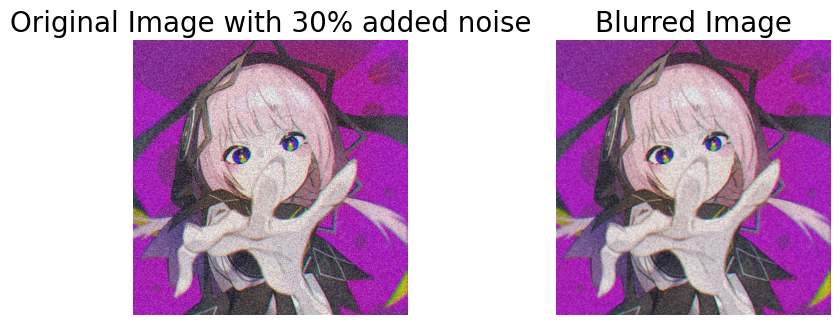

In [16]:
i = 1
pylab.figure(figsize = (10, 25))

for prop_noise in np.linspace(0.05, 0.3, 3):
  im = Image.open('/content/content.jpg')
  n = int(im.width * im.height * prop_noise)
  x, y = np.random.randint(0, im.width, n), np.random.randint(0, im.height, n)

for(x,y) in zip(x,y):
  im.putpixel((x, y), ((0,0,0) if np.random.rand() < 0.5 else (255,255,255)))

pylab.subplot(6,2,i), plot_image(im, 'Original Image with ' + str(int(100*prop_noise)) + '% added noise')
i += 1
im1 = im.filter(ImageFilter.BLUR)
pylab.subplot(6,2,i), plot_image(im1, 'Blurred Image')
i += 1
pylab.show()

# Image Warping

Horizontal Stretching

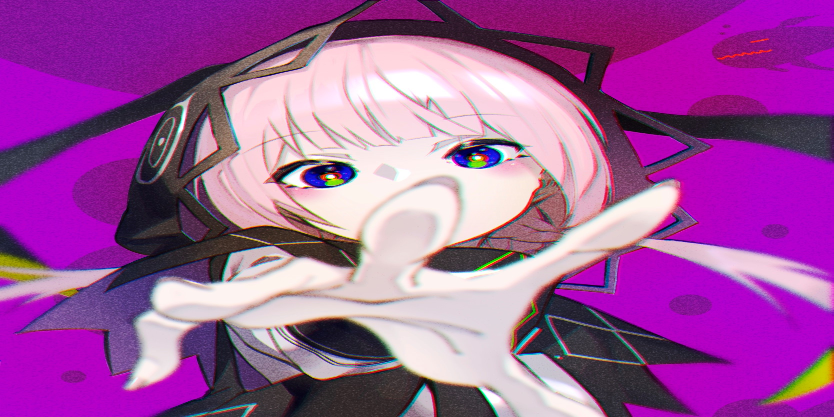

In [21]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/content.jpg')

# Define the scale factor for horizontal stretching
scale_factor_x = 0.5

# Perform horizontal stretching and make it smaller
stretched_image = cv2.resize(image, None, fx=scale_factor_x, fy=0.25)

# Display the stretched and smaller image
cv2_imshow(stretched_image)





Vertical Stretching

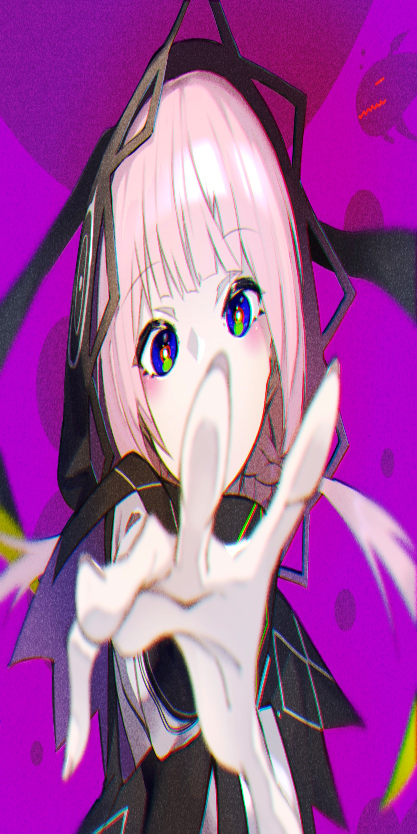

In [23]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/content.jpg')

# Define the scale factor for vertical stretching (e.g., 0.5 for making it half the height)
scale_factor_y = 0.5

# Perform vertical stretching and make it smaller
stretched_image = cv2.resize(image, None, fx=0.25, fy=scale_factor_y)

# Display the stretched and smaller image
cv2_imshow(stretched_image)
